In this assignment, we will run ridge regression multiple times with different L2 penalties to see which one produces the best fit. We will revisit the example of polynomial regression as a means to see the effect of L2 regularization. 

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge

%matplotlib notebook

In [2]:
dtype_dict = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':str, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int}

In [3]:
def poly_df(dataset, feature, target, degree):
    '''Takes array with feature column and (int)degree.
    Returns DataFrame with Target as first col followed by features'''
    # degree >=1
    
    poly_df=pd.DataFrame()
    poly_df['price']=dataset[target]
    poly_df['power_1']=dataset[feature]
    
    #cehck if degree >1
    if degree > 1:
        for power in range(2, degree+1): #loop over reaming deg
            name = 'power_'+str(power)
            poly_df[name]=poly_df['power_1'].apply(lambda x: x**power)
            
    return poly_df

In [4]:
def Coeff2(x, power):
    '''Prints intercept and coeff in a better format
    
    Paramaters:
    ------------
    x : name of model
    power: int,  degree of polynomial function
    
    Returns: Coefficients table'''
    
    coef_df=pd.DataFrame()
    coef_df=coef_df.append({"Name":'Intercept', 'Value':x.intercept_}, ignore_index=True)
    coef_df=coef_df.append({'Name':'Power_1','Value':x.coef_[0]}, ignore_index=True)
    
    if power > 1:
        for power in range(2, power+1):
            name= 'Power_' + str(power)
            coef_df=coef_df.append({"Name":name, 'Value':'{:.3e}'.format(x.coef_[power-1])}, ignore_index=True)
    
    return coef_df

# data sets

In [5]:
sales= pd.read_csv('kc_house_data.csv', dtype=dtype_dict)
sales= sales.sort_values(by=['sqft_living','price'])

#15th deg dataset


# implement L2

In [9]:
def Ridge_prep_model_and_predict(dataset, feature, target, degree, l2_penalty, plot):
    
    '''Usefull fucntion to analyze the 4 subsets.
    Paramaters
    ------------
    feature: str, name of feat. col in df
    target: str, name of target col in df
    dataset: DataFrame, dataset to use
    degree: int, deg of polynomial function
    plot: Boolean, True for plotting
    
    Returns:
    ----------
    poly_df: DF with target as first col and features following
    model: trained model on specified Dataset
    coef_df: coeficients table for the features and intercept as firt entry
            '''
    
    # part 1: make a df with relevant format and features 
        # degree >=1
    poly_set=poly_df(dataset, feature, target, degree)
            
    #part 2: make model and predictions
    
    features=list(poly_set.columns[1:])
    X=poly_set[features]
    y=poly_set[target]
    model=Ridge(alpha=l2_penalty, normalize=True).fit(X,y)
    predictions=model.predict(X)
    
    #part 3: put weights in a nice df
    
    coef_df=pd.DataFrame()
    coef_df=coef_df.append({'Name':'Intercept', 'Value':model.intercept_}, ignore_index=True)
    coef_df=coef_df.append({'Name':'Power_1',   'Value':model.coef_[0]},   ignore_index=True)
    
    if degree > 1:
        for degree in range(2, degree+1):
            name = 'Power_' + str(degree)
            coef_df = coef_df.append({"Name":name, 
                                      'Value':'{:.3e}'.format(model.coef_[degree-1])}, ignore_index=True)
    #prt 4: plot it
    if plot == True:
        
        plt.figure()
        plt.plot(poly_set['power_1'], poly_set[str(target)], '.',
                poly_set['power_1'], predictions, '-')

        plt.xlabel('Square feet, living area')
        plt.ylabel('Price per Sqft')
        plt.ticklabel_format(axis='y', style='sci', scilimits=(-2,2))
        plt.show
    return poly_set, model, coef_df

<IPython.core.display.Javascript object>


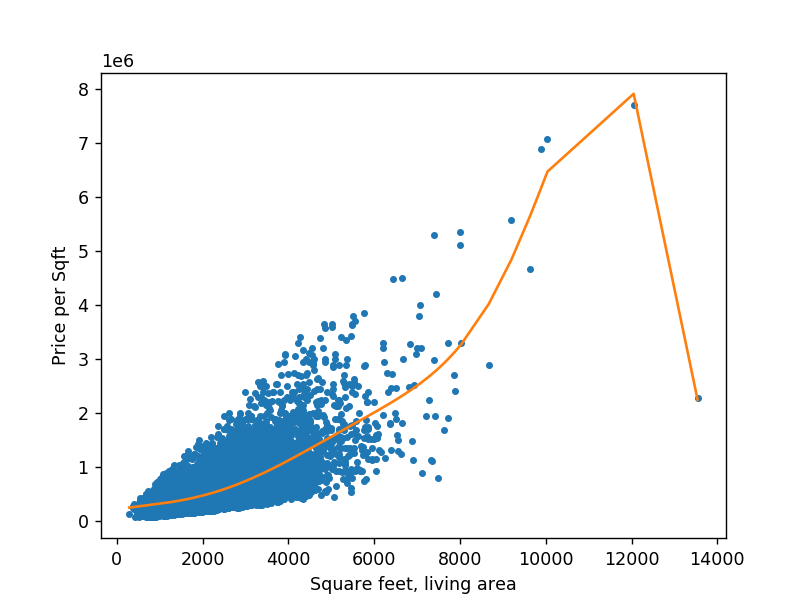

In [10]:
model_ridge=Ridge_prep_model_and_predict(sales, 'sqft_living','price',15, 1.5e-5,True)

## Q1 Coef for power_1???

In [11]:

model_ridge[2]

,Name,Value
0,Intercept,220664
1,Power_1,124.873
2,Power_2,-4.774e-02
3,Power_3,3.014e-05
4,Power_4,-2.444e-09
5,Power_5,-1.942e-13
6,Power_6,8.541e-18
7,Power_7,1.511e-21
8,Power_8,8.280e-26
9,Power_9,6.526e-31


# use sub sets now

## Q2/Q3 For the models learned in each of these training sets, what are the smallest/largest value you learned for the coefficient of feature power_1? Choose the range that contains this value

In [12]:
sub_1=pd.read_csv('wk3_kc_house_set_1_data.csv', dtype=dtype_dict)
sub_2=pd.read_csv('wk3_kc_house_set_2_data.csv', dtype=dtype_dict)
sub_3=pd.read_csv('wk3_kc_house_set_3_data.csv', dtype=dtype_dict)
sub_4=pd.read_csv('wk3_kc_house_set_4_data.csv', dtype=dtype_dict)
l2_small_penalty=1e-9

In [13]:
# in the next 4 sub models im saving the coef in model_sub_...

<IPython.core.display.Javascript object>


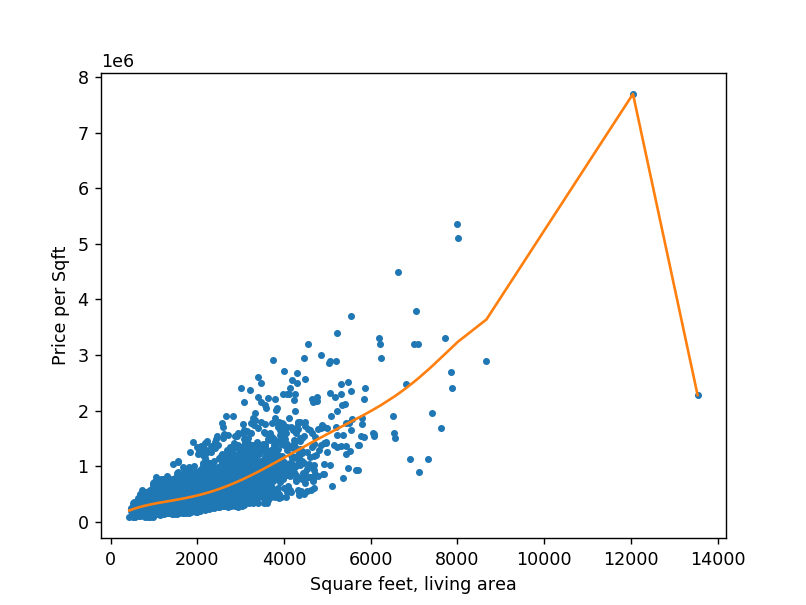

In [15]:
model_sub_1=Ridge_prep_model_and_predict(sub_1, 'sqft_living','price', 15,
                                        l2_small_penalty, True)[2]


<IPython.core.display.Javascript object>


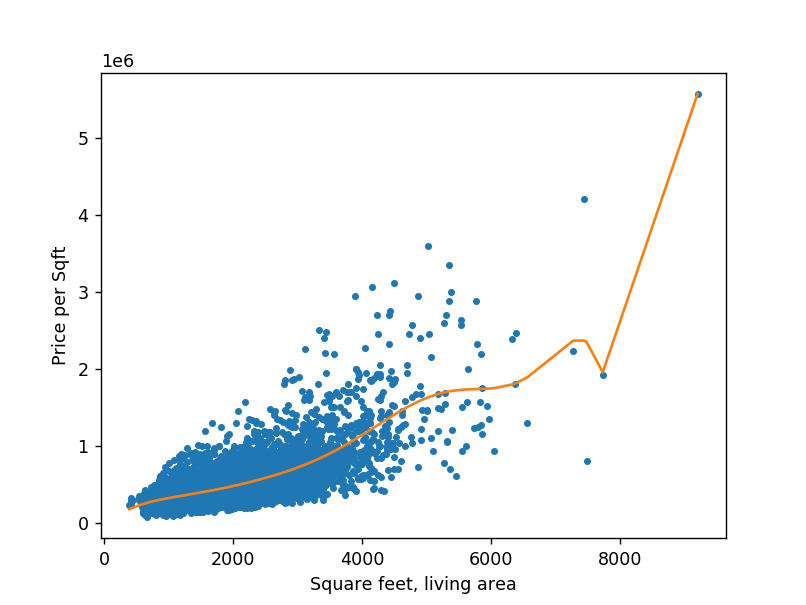

In [16]:
model_sub_2=Ridge_prep_model_and_predict(sub_2, 'sqft_living','price',15,
                                        l2_small_penalty, True)[2]

<IPython.core.display.Javascript object>


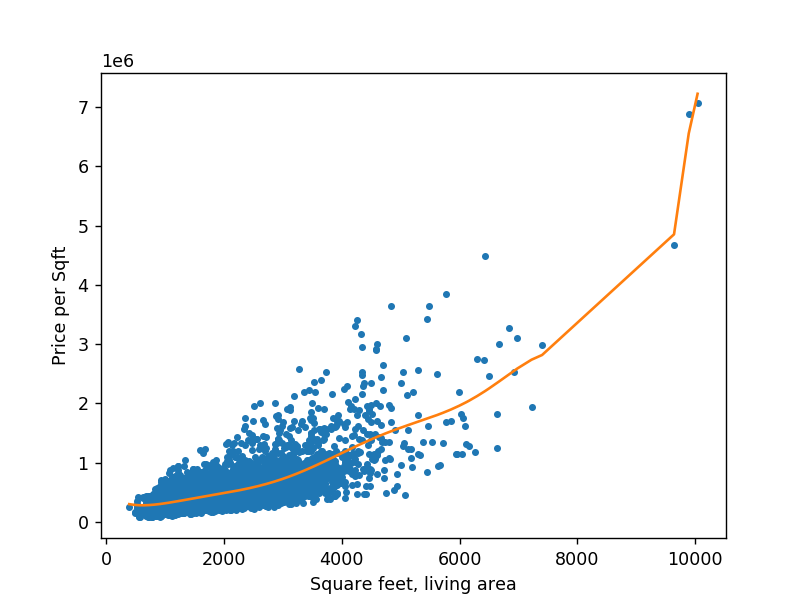

In [17]:
model_sub_3=Ridge_prep_model_and_predict(sub_3, 'sqft_living','price', 15,
                                        l2_small_penalty, True)[2]

<IPython.core.display.Javascript object>


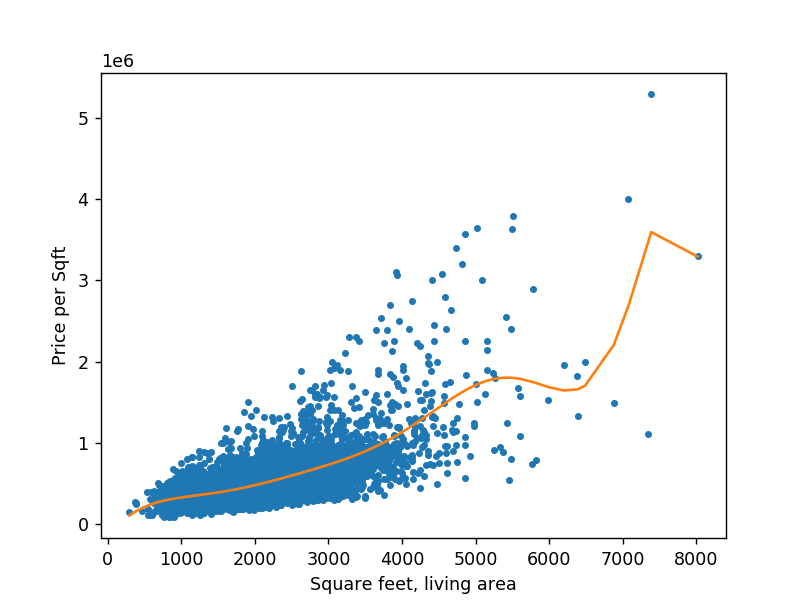

In [18]:
model_sub_4=Ridge_prep_model_and_predict(sub_4, 'sqft_living','price', 15,
                                        l2_small_penalty, True)[2]

In [20]:
power1_dict={'sub_1':{model_sub_1.values[0,0]:round(model_sub_1.values[0,1],2),
                      model_sub_1.values[1,0]:round(model_sub_1.values[1,1],2)},
             'sub_2':{model_sub_2.values[0,0]:round(model_sub_2.values[0,1],2),
                      model_sub_2.values[1,0]:round(model_sub_2.values[1,1],2)},
             'sub_3':{model_sub_3.values[0,0]:round(model_sub_3.values[0,1],2),
                      model_sub_3.values[1,0]:round(model_sub_3.values[1,1],2)},
             'sub_4':{model_sub_4.values[0,0]:round(model_sub_4.values[0,1],2),
                      model_sub_4.values[1,0]:round(model_sub_4.values[1,1],2)}}

power1_df=pd.DataFrame(power1_dict)
power1_df

,sub_1,sub_2,sub_3,sub_4
Intercept,23888.82,-55614.64,470987.86,-145655.60
Power_1,544.67,859.36,-755.40,1119.45


# Ridge regression comes to rescue


## Q4/Q5 For the models learned with the high level of regularization in each of these training sets, what are the smallest/largest value you learned for the coefficient of feature power_1? 

<IPython.core.display.Javascript object>


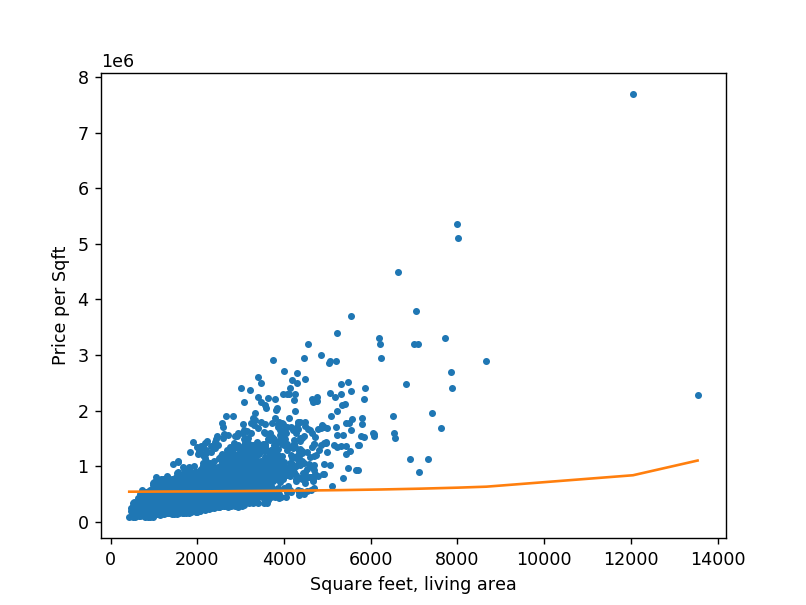

In [21]:
l2_large_penalty=1.23e2

model_sub_1_large=Ridge_prep_model_and_predict(sub_1, 'sqft_living','price', 15,
                                        l2_large_penalty, True)[2]

<IPython.core.display.Javascript object>


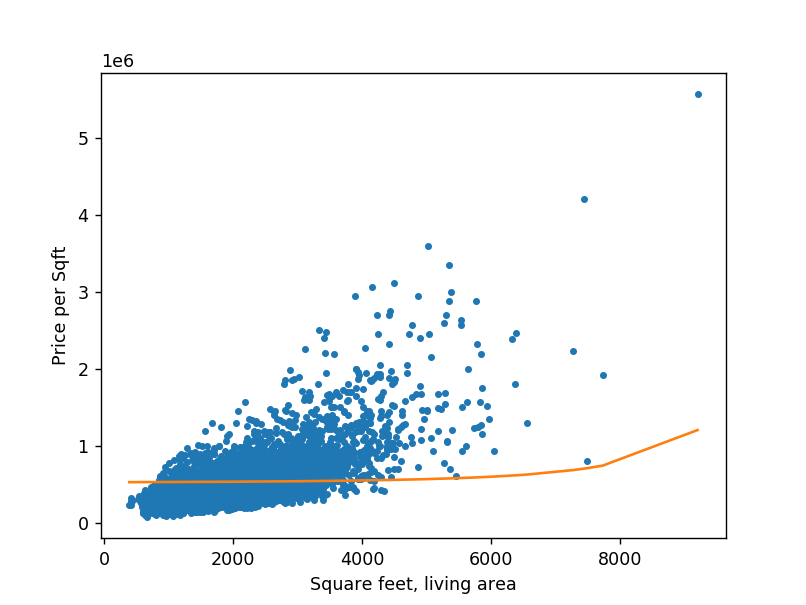

In [22]:
model_sub_2_large=Ridge_prep_model_and_predict(sub_2, 'sqft_living','price', 15,
                                        l2_large_penalty, True)[2]

<IPython.core.display.Javascript object>


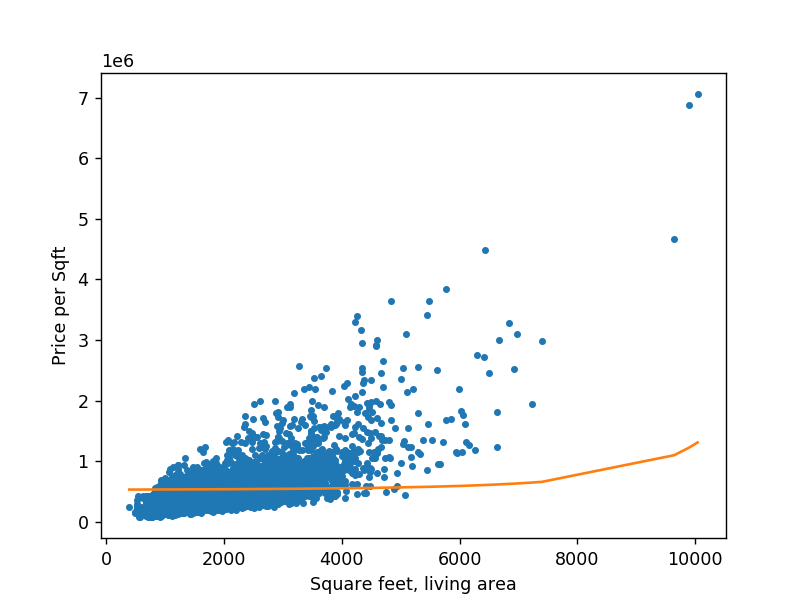

In [23]:
model_sub_3_large=Ridge_prep_model_and_predict(sub_3, 'sqft_living','price', 15,
                                        l2_large_penalty, True)[2]

<IPython.core.display.Javascript object>


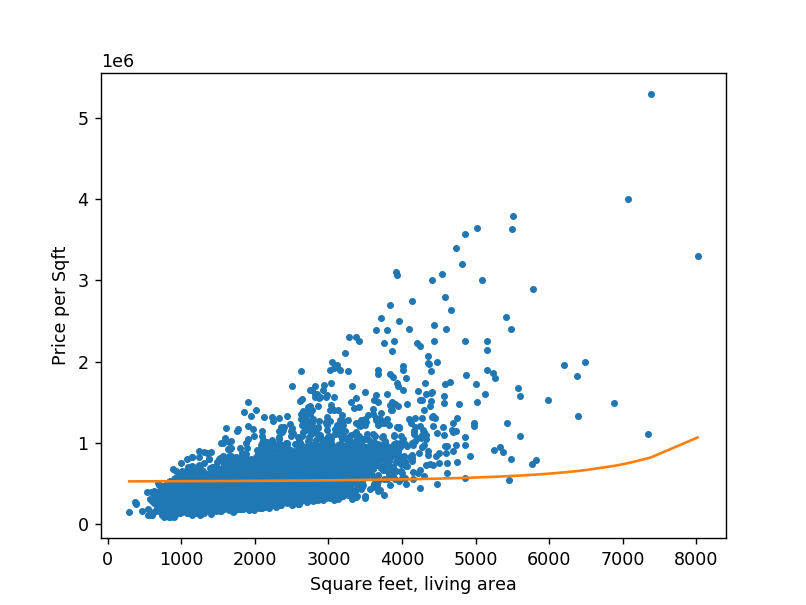

In [24]:
model_sub_4_large=Ridge_prep_model_and_predict(sub_4, 'sqft_living','price', 15,
                                        l2_large_penalty, True)[2]

In [25]:
power1_large_dict={'sub_1_large':{model_sub_1_large.values[0,0]:round(model_sub_1_large.values[0,1],2),
                                  model_sub_1_large.values[1,0]:round(model_sub_1_large.values[1,1],2)},
                     'sub_2_large':{model_sub_2_large.values[0,0]:round(model_sub_2_large.values[0,1],2),
                                    model_sub_2_large.values[1,0]:round(model_sub_2_large.values[1,1],2)},
                     'sub_3_large':{model_sub_3_large.values[0,0]:round(model_sub_3_large.values[0,1],2),
                                    model_sub_3_large.values[1,0]:round(model_sub_3_large.values[1,1],2)},
                     'sub_4_large':{model_sub_4_large.values[0,0]:round(model_sub_4_large.values[0,1],2),
                                    model_sub_4_large.values[1,0]:round(model_sub_4_large.values[1,1],2)}}

power1_large_df=pd.DataFrame(power1_large_dict)
power1_large_df

,sub_1_large,sub_2_large,sub_3_large,sub_4_large
Intercept,539103.03,529853.03,533640.11,524562.97
Power_1,2.33,2.10,2.29,2.09


# Selecting an L2 penalty via cross-validation


## Q6 What is the best value for the L2 penalty according to 10-fold validation?

In [26]:
train_valid_shuffled = pd.read_csv('wk3_kc_house_train_valid_shuffled.csv', dtype=dtype_dict)
test = pd.read_csv('wk3_kc_house_test_data.csv', dtype=dtype_dict)

In [27]:
# use KFold method to split the data

n = len(train_valid_shuffled)
k = 10 # 10-fold cross-validation

for i in range(k):
    start = int((n*i)/k)
    end = int((n*(i+1))/k-1)
    print(i, (start, end))

0 (0, 1938)
1 (1939, 3878)
2 (3879, 5817)
3 (5818, 7757)
4 (7758, 9697)
5 (9698, 11636)
6 (11637, 13576)
7 (13577, 15515)
8 (15516, 17455)
9 (17456, 19395)


In [28]:
k=10
for i in range(k):
    start=int((n*i)/k)
    end=int((n*(i+1))/k-1)
    valid_set=train_valid_shuffled[start:end+1]
    train_set=train_valid_shuffled[0:start].append(train_valid_shuffled[end+1:n])

In [31]:
def KFold_cv(dataset, feature, target, degree, l2_penalty_values, k):
    
    poly_set = poly_df(dataset, feature, target, degree)
    features = list(poly_set.columns[1:])
    
    #lets do the folds
    rss_sum         = 0.0
    n               = len(dataset)
    l2_penalty_rss  = []
    min_rss         = None
    best_l2_penalty = None
    
    for l2_penalty in l2_penalty_values:
        next_rss = 0.0
        
        for i in range(k):
            start = int( (n*i)/k )
            end   = int( (n*(i+1))/k-1 )
            valid_set = poly_set[start:end+1]
            train_set = poly_set[0:start].append(poly_set[end+1:n]) 
            
            X_train = train_set[features]
            y_train = train_set[target]
            X_valid = valid_set[features]
            y_valid = valid_set[target]
            
            model = Ridge(alpha=l2_penalty, normalize=True).fit(X_train, y_train)
            y_valid_pred = model.predict(X_valid)
            
            next_rss += ( (y_valid_pred - y_valid)**2 ).sum()
        
        next_rss = next_rss/n
        l2_penalty_rss.append(next_rss)
        if min_rss is None or next_rss < min_rss:
           
            min_rss = next_rss
            best_l2_penalty = l2_penalty 
            
    return {'Lowest RSS':'{:.2e}'.format(min(l2_penalty_rss)), 'l2_penalty': best_l2_penalty}


In [32]:
l2_log=np.logspace(3,9, num=13)
num_kfolds=10

kf=KFold_cv(train_valid_shuffled, 'sqft_living', 'price', 15, l2_log, 10)

In [33]:
best_l2=kf

{'Lowest RSS': '1.37e+11', 'l2_penalty': 1000.0}

In [42]:
best_l2=kf.get('l2_penalty')
best_l2

1000.0

## Q7 Using the best L2 penalty found above, train a model using all training data. Which of the following ranges contains the RSS on the TEST data of the model you learn with this L2 penalty?

In [55]:
#test set
poly_test=poly_df(test,'sqft_living','price', 15)
X_test=poly_test.loc[:,'power_1':]
Y_test=poly_test['price']


In [57]:
#train set
poly_train=poly_df(train_valid_shuffled,'sqft_living','price', 15)
X_train=poly_train.loc[:,'power_1':]
Y_train=poly_train['price']

In [60]:
ridge_model=Ridge(alpha=best_l2, normalize=True).fit(X_train, Y_train)
y_pred= ridge_model.predict(X_test)

rss= sum( (y_pred-Y_test)**2)
print('{:.2e}'.format(rss))

2.84e+14
